In [605]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from scipy.fft import fft, fftfreq,ifft
from scipy.signal import argrelextrema
import time
from sklearn.linear_model import LinearRegression

7.2
7.2
2.0
2.5


C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/1770294453.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  xt[i]=x[i]*np.exp(-2*np.pi*1j*k*i/N)


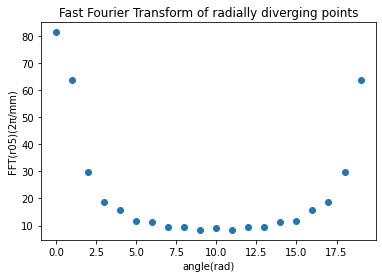

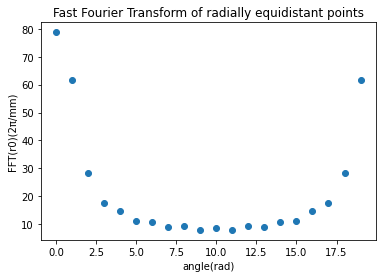

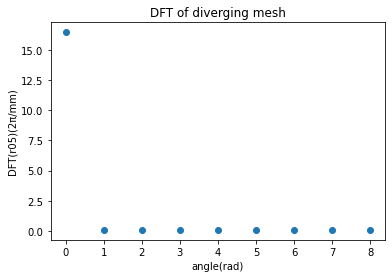

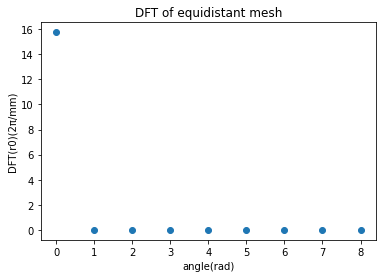

In [606]:
def DFT(x,N):
    xt=np.zeros(N)
    xf=np.zeros(N)
    for k in range(N):
        for i in range(N):
            xt[i]=x[i]*np.exp(-2*np.pi*1j*k*i/N)
        xf[k]=sum(xt)
    return xf
def RadialMeshGenerator(pointDis,MeshSize,ratio):
     # number of bins in r and theta dimensions
    N_bins_theta = round(MeshSize/(np.sqrt(2**3)*pointDis))
    N_bins_r = round(MeshSize/(np.sqrt(2**3)*pointDis))

    # limits in r dimension
    rmin = 0
    rmax = MeshSize/2

    # setting up 1D arrays in r and theta
    pausur=(rmax)/N_bins_r
    up=pointDis/np.sqrt(2)*ratio
    r=np.zeros(N_bins_r)
    for i in range(N_bins_r):
        r[i]=pausur*i+up*i**2
     
    theta = np.linspace(0, 2*np.pi, N_bins_theta*3)  # N.B. radians not degrees

    # 'gridding' the 1D arrays into 2D arrays so they can be used by pcolor
    theta, r = np.meshgrid(theta, r)
    return theta,r
    

def get_frecuency(xf,ite):
    erroak=[]
    dif=0
    # for local minima
    minima=argrelextrema(xf,np.less)[0]
    for inde in minima:
            erroak.append(ite[inde])
            for i in range(len(erroak)-1):
                dif+=erroak[i+1]-erroak[i]
    return dif/len(erroak)


def MeshGenerator(pointDis,MeshSize):
    
    pausux=pointDis
    pausuy=pointDis
    numx=round(MeshSize/pointDis)
    numy=round(MeshSize/pointDis)
    if(np.mod(numx,2)==0):
        numx+=1
    if(np.mod(numy,2)==0):
        numy+=1
    x=np.zeros(numx*numy)
    y=np.zeros(numy*numy)
    for i in range(numx):
        for j in range(numy):
            x[j+numx*i]=pausux*i-MeshSize/2
            y[j+numy*i]=pausuy*j-MeshSize/2
    fig,plot=plt.subplots()
    plot.set_title("Mesh")
    plot.scatter(x,y)
#Setting grid physical parameters
pointDis=1.25
MeshSize=35


#Generate diverging radial mesh
theta05,r05=RadialMeshGenerator(pointDis,MeshSize,ratio=0.01)
#Generate equidistant radial mesh
theta0,r0=RadialMeshGenerator(pointDis,MeshSize,ratio=0)


#FFT of diverging mesh
r=np.zeros(len(r05))
for i in range(len(r05)):
    r[i]=r05[i][0]
zeroak=10
rexp05=np.zeros(len(r)+zeroak)
a=slice(round(zeroak/2),-round(zeroak/2))
rexp05[a]=r
rf05=fft(rexp05)
r05frek=np.arange(0,len(rf05))
fig2,ax2=plt.subplots()
ax2.set_xlabel("angle(rad)")
ax2.set_ylabel("FFT(r05)(2π/mm)")
ax2.set_title("Fast Fourier Transform of radially diverging points")
ax2.scatter(r05frek,np.abs(rf05))
savefig=("simul_radial_div.png")
print(get_frecuency(rf05,r05frek))

#FFT of equidistant mesh
r=np.zeros(len(r0))
for i in range(len(r0)):
    r[i]=r0[i][0]
rexp0=np.zeros(len(r)+zeroak)
rexp0[a]=r
rf0=fft(rexp0)
r0frek=np.arange(0,len(rf0))
fig3,ax3=plt.subplots()
ax3.set_xlabel("angle(rad)")
ax3.set_ylabel("FFT(r0)(2π/mm)")
ax3.set_title("Fast Fourier Transform of radially equidistant points")
ax3.scatter(r0frek,np.abs(rf0))
savefig=("simul_radial.png")
print(get_frecuency(rf0,r0frek))


# DFT of diverging mesh
r=np.zeros(len(r05))
rdis=np.zeros(len(r05)-1)
for i in range(len(r05)):
    r[i]=r05[i][0]
for i in range(len(r)-1):
    rdis[i]=r[i+1]-r[i]
rdisx=np.zeros(len(rdis)+zeroak)
if(np.mod(zeroak,2)!=0):
    a=slice(int(zeroak/2),-int(zeroak/2))
    rdisx[a]=rdis
else:
    rdisx=rdis
rf05=DFT(rdisx,len(rdisx))
rfrek05=np.arange(len(rf05))
fig3,plot3=plt.subplots()
plot3.set_xlabel("angle(rad)")
plot3.set_ylabel("DFT(r05)(2π/mm)")
plot3.set_title("DFT of diverging mesh")
plot3.scatter(rfrek05,np.abs(rf05))
print(get_frecuency(rf05,rfrek05))


#DFT of equidistant mesh
r=np.zeros(len(r0))
rdis=np.zeros(len(r0)-1)
for i in range(len(r05)):
    r[i]=r0[i][0]
for i in range(len(r)-1):
    rdis[i]=r[i+1]-r[i]
rdisx=np.zeros(len(rdis)+zeroak)
if(np.mod(zeroak,2)!=0):
    a=slice(int(zeroak/2),-int(zeroak/2))
    rdisx[a]=rdis
else:
    rdisx=rdis
rf0=DFT(rdisx,len(rdisx))
rfrek0=np.arange(len(rf0))
fig3,plot3=plt.subplots()
plot3.set_xlabel("angle(rad)")
plot3.set_ylabel("DFT(r0)(2π/mm)")
plot3.set_title("DFT of equidistant mesh")
ken=rf05-rf0
plot3.scatter(rfrek0,np.abs(rf0))
print(get_frecuency(ken,rfrek0))

In [607]:
def f(re,rd):
    emi_fft=np.zeros(700)
    for i in range(2,700,2):
        reex=np.zeros(len(re)+i)
        rdex=np.zeros(len(rd)+i)
        a=slice(int(np.floor(i/2)),-int(np.floor(i/2)))
        if(i!=0):
            reex[a]=re
            rdex[a]=rd
        else:
            reex=re
            rdex=rd
        rdf=fft(rdex)/(2*np.pi)
        ref=fft(reex)/(2*np.pi)
        dif=get_DFT_max(np.abs(ref),np.abs(rdf))
        b0,b1=get_coor(40,i)
        emi_fft[i]=(b1*dif+b0)
        emi_fft_fft=fft(emi_fft)
        pasa=np.zeros(len(emi_fft_fft))
        pasa[0]=emi_fft_fft[0]
        sinu=ifft(pasa)
    return np.abs(sinu[0])
    
    
def get_DFT_max(rfe,rfd):
    maximoak=[]
    # for local minima
    maxima=argrelextrema(rfd,np.greater)[0]
    dif=0
    for maxi in maxima:
        dif+=np.abs(rfd[maxi]-rfe[maxi])
    return dif


def get_coor(n,zeroak):
    punta=np.zeros(n)
    emi=np.zeros(n)
    for i in range(n):
        #Generate meshes
        theta0,r0=RadialMeshGenerator(Aactualmesh,35,0)
        theta05,r05=RadialMeshGenerator(Aactualmesh,35,(i+1)*0.01)
        re=np.zeros(len(r0))
        rd=np.zeros(len(r05))
        rp=np.zeros(len(r05))
        #Extract theta=0 meridian from meshes
        for j in range(len(r0)):
            re[j]=r0[j][0]
        for j in range(len(r05)):
            rd[j]=r05[j][0]
        for j in range(len(r05)):
            rp[j]=rd[j]-re[j]
        #Calculate r'
        for j in range(len(rp)):
            rp[j]=rd[j]-re[j]
         #Calculate emittance
        remean=np.mean(re)#\overline{r}
        rpmean=np.mean(rp)#\overline{r'}
        rs2=np.mean((re-remean)**2)#\<r^2>
        rsp2=np.mean((rp-rpmean)**2)#\<r'^2>
        rex05rp=np.mean((re-remean)*(rp-rpmean))#\<rr'>
        emi[i]=np.sqrt(rs2*rsp2-rex05rp**2)
        #Apply FFT to data
        rpex=np.zeros(len(rp)+zeroak)
        reex=np.zeros(len(rd)+zeroak)
        rdex=np.zeros(len(re)+zeroak)
        if(np.mod(zeroak,2)!=0):
            zeroak=+1
        a=slice(round(zeroak/2),-round(zeroak/2))
        if(zeroak/2>=1):
            rpex[a]=rp
            reex[a]=re
            rdex[a]=rd
        else:
            rpex=rp
            reex=re
            rdex=rd
        rpf=fft(rpex)
        ref=fft(reex)
        rdf=fft(rdex)
        punta[i]=get_DFT_max(ref,rdf)
    punta=np.array(punta).reshape(-1,1)
    model = LinearRegression()
    model.fit(punta/len(rpf),emi)
    b0=model.intercept_
    b1=model.coef_
    return b0,b1

Aactualmesh=1.25
theta0,r0=RadialMeshGenerator(Aactualmesh,35,0)
theta05,r05=RadialMeshGenerator(Aactualmesh,35,0.01)
re=np.zeros(len(r0))
rd=np.zeros(len(r05))
rp=np.zeros(len(r05))
zeroak=50
for j in range(len(r0)):
    re[j]=r0[j][0]
for j in range(len(r05)):
    rd[j]=r05[j][0]
for j in range(len(r05)):
    rp[j]=rd[j]-re[j]
rpex=np.zeros(len(rp)+zeroak)
reex=np.zeros(len(rd)+zeroak)
rdex=np.zeros(len(re)+zeroak)
if(np.mod(zeroak,2)!=0):
    zeroak=+1
a=slice(round(zeroak/2),-round(zeroak/2))
if(zeroak!=0):
    rpex[a]=rp
    reex[a]=re
    rdex[a]=rd
else:
    rpex=rp
    reex=re
    rdex=rd
rdf=fft(rdex)/(2*np.pi)
ref=fft(reex)/(2*np.pi)
dif=get_DFT_max(np.abs(ref),np.abs(rdf))
b0,b1=get_coor(40,zeroak)
emi_fft=(b1*dif+b0)
#Calculate emittance
remean=np.mean(re)#\overline{r}
rpmean=np.mean(rp)#\overline{r'}
rs2=np.mean((re-remean)**2)#\<r^2>
rsp2=np.mean((rp-rpmean)**2)#\<r'^2>
rex05rp=np.mean((re-remean)*(rp-rpmean))#\<rr'>
emi=np.sqrt(rs2*rsp2-rex05rp**2)
print("Metodo arruntarekin lorturiko emitantzia: ",emi)
print("FFT-aren bidez lortutako emitantzia: ",emi_fft[0])
print("Errore erlatiboa %",2*np.abs((emi_fft-emi)/(emi+emi_fft))[0]*100)

Metodo arruntarekin lorturiko emitantzia:  0.32283231425153314
FFT-aren bidez lortutako emitantzia:  0.3125915674183349
Errore erlatiboa % 3.223280436450072


# Recalculating emmitance deleting random points for grids 

In [608]:
def erroreak(rp,re,rdf,ref):
    if(len(rp)*0.1<1):
        print("Puntuen ezabatzea ezinezkoa puntu gehiago hartu!")
    else:
        for i in range(round(len(rp)*0.5)):
            rp[random.choice(range(len(rp)))]=0
            rdf[random.choice(range(len(rdf)))]=0
    remean=np.mean(re)#\overline{r}
    rpmean=np.mean(rp)#\overline{r'}
    rs2=np.mean((re-remean)**2)#\<r^2>
    rsp2=np.mean((rp-rpmean)**2)#\<r'^2>
    rex05rp=np.mean((re-remean)*(rp-rpmean))#\<rr'>
    emi=np.sqrt(rs2*rsp2-rex05rp**2)
    dif=get_DFT_max(np.abs(ref),np.abs(rdf))
    b0,b1=get_coor(40,zeroak)
    emi_fft=(b1*dif+b0)
    errore=2*np.abs((emi_fft-emi)/(emi+emi_fft))[0]*100
    #print("Metodo arruntarekin lorturiko emitantzia: ",emi)
    #print("FFT-aren bidez lortutako emitantzia: ",emi_fft[0])
    return errore
errore=np.zeros(1000)
for n in range(1000):
    errore[n]=erroreak(rp,re,rdf,ref)
print("Errore erlatiboa: %",sum(errore)/1000)

Errore erlatiboa: % 199.22065900622607


C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pasa[0]=emi_fft_fft[0]
C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pasa[0]=emi_fft_fft[0]
C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pasa[0]=emi_fft_fft[0]
C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pasa[0]=emi_fft_fft[0]
C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pasa[0]=emi_fft_fft[0]
C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pas

C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pasa[0]=emi_fft_fft[0]
C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pasa[0]=emi_fft_fft[0]
C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pasa[0]=emi_fft_fft[0]
C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pasa[0]=emi_fft_fft[0]
C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pasa[0]=emi_fft_fft[0]
C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pas

C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pasa[0]=emi_fft_fft[0]
C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pasa[0]=emi_fft_fft[0]
C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pasa[0]=emi_fft_fft[0]
C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pasa[0]=emi_fft_fft[0]
C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pasa[0]=emi_fft_fft[0]
C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pas

C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pasa[0]=emi_fft_fft[0]
C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pasa[0]=emi_fft_fft[0]
C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pasa[0]=emi_fft_fft[0]
C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pasa[0]=emi_fft_fft[0]
C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pasa[0]=emi_fft_fft[0]
C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pas

C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pasa[0]=emi_fft_fft[0]
C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pasa[0]=emi_fft_fft[0]
C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pasa[0]=emi_fft_fft[0]
C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pasa[0]=emi_fft_fft[0]
C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pasa[0]=emi_fft_fft[0]
C:\Users\Usuario\AppData\Local\Temp/ipykernel_13112/3205198866.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pas

0.23289598329776426


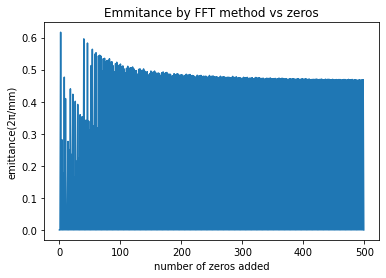

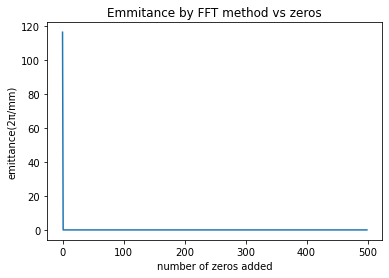

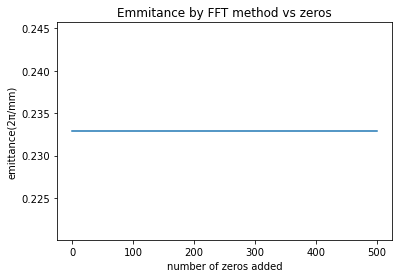

In [624]:
def f(re,rd):
    emi_fft=np.zeros(500)
    for i in range(2,500,2):
        reex=np.zeros(len(re)+i)
        rdex=np.zeros(len(rd)+i)
        a=slice(int(np.floor(i/2)),-int(np.floor(i/2)))
        if(i!=0):
            reex[a]=re
            rdex[a]=rd
        else:
            reex=re
            rdex=rd
        rdf=fft(rdex)/(2*np.pi)
        ref=fft(reex)/(2*np.pi)
        dif=get_DFT_max(np.abs(ref),np.abs(rdf))
        b0,b1=get_coor(40,i)
        emi_fft[i]=(b1*dif+b0)
        emi_fft_fft=fft(emi_fft)
        pasa=np.zeros(len(emi_fft_fft))
        pasa[0]=emi_fft_fft[0]
        sinu=ifft(pasa)
    fig,plot=plt.subplots()
    plot.set_xlabel("number of zeros added")
    plot.set_ylabel("emittance(2π/mm)")
    plot.set_title("Emmitance by FFT method vs zeros")
    plot.plot(range(500),np.abs(emi_fft))
    
    fig1,plot1=plt.subplots()
    plot1.set_xlabel("number of zeros added")
    plot1.set_ylabel("emittance(2π/mm)")
    plot1.set_title("Emmitance by FFT method vs zeros")
    plot1.plot(range(500),np.abs(pasa))
    
    fig2,plot2=plt.subplots()
    plot2.set_xlabel("number of zeros added")
    plot2.set_ylabel("emittance(2π/mm)")
    plot2.set_title("Emmitance by FFT method vs zeros")
    plot2.plot(range(500),np.abs(sinu))
    print(np.abs(sum(emi_fft)/len(emi_fft)))
f(re,rd)